In [168]:
import sqlite3
import pandas as pd

In [169]:
connection = sqlite3.connect("../data/twitter.db")
crsr = connection.cursor()

In [170]:
df_tweets = pd.read_sql('SELECT * FROM tweets', connection, parse_dates=['created_at'])
df_users = pd.read_sql('SELECT * FROM users', connection)

In [171]:
df_tweets.head()

,id,text,author_id,created_at,retweet_count,reply_count,like_count,quote_count
0,1578613094191796224,"Gente muy agradable en @TheBridge_Tech , te ri...",1578095844569514011,2022-10-08 05:07:45,0,0,0,0
1,1577334577701453827,Recordaros que la semana que viene tenemos la ...,1003872445,2022-10-04 16:27:23,2,0,12,0
2,1576902991507922944,El desarrollador web es uno de los perfiles má...,2529499620,2022-10-03 11:52:25,3,0,3,0
3,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!,706520411551494145,2022-10-03 08:48:29,0,0,1,0
4,1575217357105946624,Hoy por fin ve la luz mi primer Case Study púb...,604485175,2022-09-28 20:14:18,3,0,4,0


In [172]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             154 non-null    object        
 1   text           154 non-null    object        
 2   author_id      154 non-null    object        
 3   created_at     154 non-null    datetime64[ns]
 4   retweet_count  154 non-null    int64         
 5   reply_count    154 non-null    int64         
 6   like_count     154 non-null    int64         
 7   quote_count    154 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 9.8+ KB


In [173]:
df_users.head()

,id,name,username
0,1578095844569514011,Rocket,75_Rocket_
1,1003872445,Pau Mugarra,PauMugarra
2,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3
3,706520411551494145,JoseSola,Jose_Sola_
4,604485175,Berta Otero,bertinha84


In [174]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        82 non-null     object
 1   name      82 non-null     object
 2   username  82 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [175]:
print('The Bridge school has been mentioned a total of ' + str(len(df_tweets)) + ' times since 13th of June.')

The Bridge school has been mentioned a total of 154 times since 13th of June.


In [176]:
# The column social_repercussion contains the sum of the 4 metrics columns
df_tweets['social_repercussion'] = df_tweets['retweet_count'] + df_tweets['reply_count'] + df_tweets['like_count'] + df_tweets['quote_count']

print(df_tweets[df_tweets['social_repercussion']==df_tweets['social_repercussion'].max()]['text'])

6    Y seguimos con lo prometido:  Primera quedada ...
Name: text, dtype: object


In [164]:
# Author with most tweets
most_repeated_user = df_tweets['author_id'].value_counts().idxmax()

# Times this author posted
times_user_repeated = df_tweets['author_id'].value_counts()[most_repeated_user]

In [165]:
# Row which contains author information
df_users[df_users['id'] == most_repeated_user]

,id,name,username
48,1255794072280842240,Heavy Mental,HeavyMental_es


In [180]:
# Name of author with most posts
most_repeated_user_name = df_users[df_users['id'] == most_repeated_user]['name']


print('The user ' + most_repeated_user_name + ' mentioned us ' + str(times_user_repeated) + ' times.')

48    The user Heavy Mental mentioned us 12 times.
Name: name, dtype: object


In [27]:
import seaborn as sns

<AxesSubplot:>

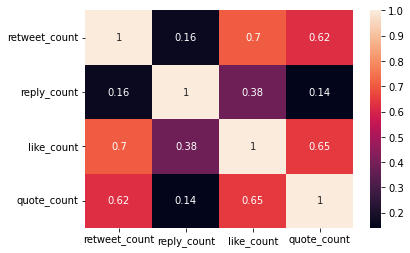

In [30]:
sns.heatmap(df_tweets.corr(), annot=True)

In [ ]:
def sql_query(query):

    # Ejecuta la query
    crsr.execute(query)

    # Almacena los datos de la query 
    ans = crsr.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)